In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

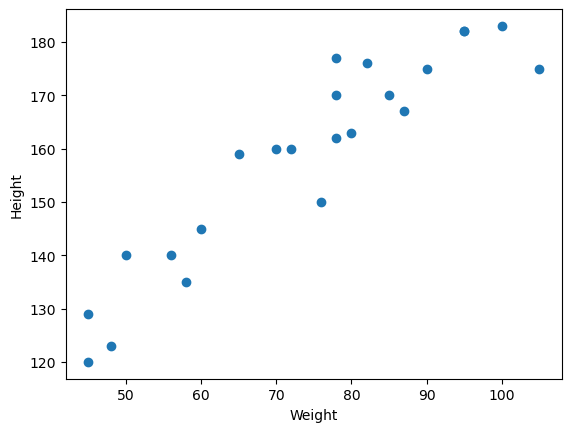

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [16]:
X=df[['Weight']]
y=df['Height']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

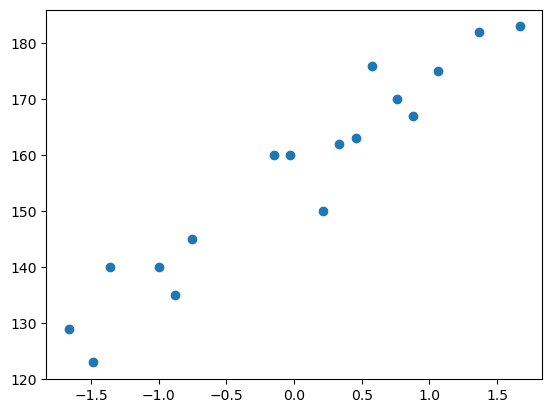

In [29]:
plt.scatter(X_train,y_train)

In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
regressor = LinearRegression()

In [23]:
regressor

LinearRegression()

In [50]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


In [52]:
regressor.fit(X_train,y_train)

LinearRegression()

In [53]:
print(regressor.coef_)
print(regressor.intercept_)


[17.2982057]
156.47058823529412


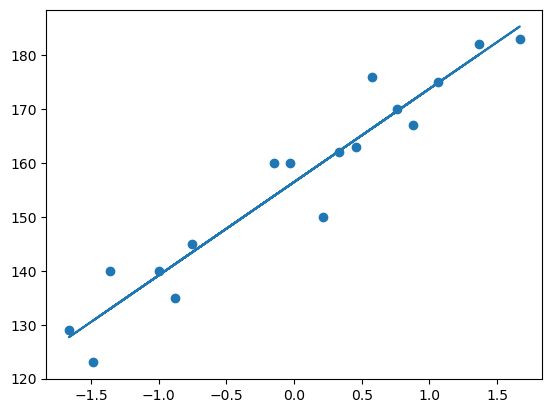

In [54]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [58]:
y_pred_test = regressor.predict(X_test)
y_pred_test.shape


(6,)

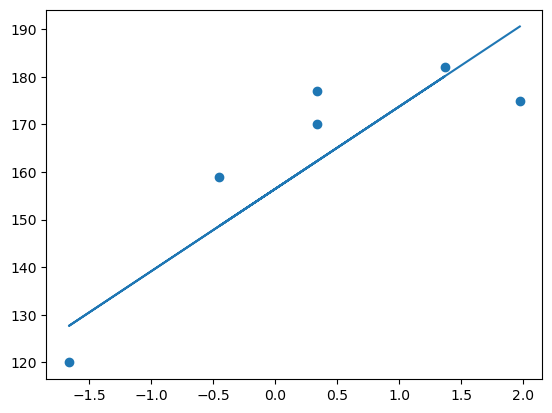

In [59]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [61]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [62]:
import statsmodels.api as sm


In [63]:
model = sm.OLS(X_train,y_train).fit()
predictions = model.predict(X_test) 


In [64]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                       0.664
Time:                        09:07:52   Log-Likelihood:                         -24.019
No. Observations:                  17   AIC:                                      50.04
Df Residuals:                      16   BIC:                                      50.87
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
